<h2> California Housing Prices - EDA </h2>

#### Data type of each feature 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
housing_data_frame = pd.read_csv("C:/Users/MrunmayiSA/Downloads/housing.csv")
print(len(housing_data_frame))
housing_data_frame.head()

20640


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<h4>Data type of each feature :</h4>
1. longitude - continuous interval (Subtracting by 0.01 gives you another longitude. Also, a higher longitudinal or latitudinal value does represent a farther distance)<br>
2. latitude - continuous interval (Subtracting by 0.01 gives you another latitude)<br>
3. housing_median_age - discrete interval<br>
4. total_rooms - discrete ratio<br>
5. total_bedrooms - discrete ratio<br>
6. population - discrete ratio<br>
7. households - discrete ratio<br>
8. median_income - continuous interval<br>
9. median_house_value - continuous interval<br>
10. ocean_proximity - discrete ordinal<br>

<h2> Summary statistics of the data <h2>

In [2]:
housing_data_frame.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<h4>What can be learnt from the summary statistics :</h4>
25% of the districts have a housing_median_age lower than 18 (fairly new buildings)<br>
There are atleast 2 total_rooms in each district<br>
75% of the districts have households that earn $47,432 average income<br>

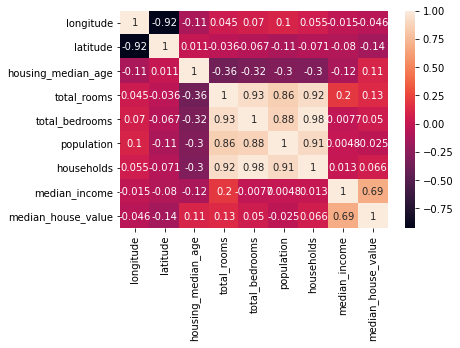

In [5]:
#Correlation between each feature and the target median_house_value
corr_matrix = housing_data_frame.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
import seaborn as sn
sn.heatmap(corr_matrix, annot=True)
plt.show()

<h4>Which features have strong correlation with the target: </h4>
The correlation coeffiecient only measures linear correlations. It ranges from -1 to 1. <br>
When it is close to 1, it means strong positive correlation. When it is close to -1, it means strong negative correlation. <br>
A value of 0.6 indicates strong positive correlation between <b>median_income</b> and <b>median_housing_value</b>.<br> 
A value of -0.14 indicates small negative correlation between <b>latitude</b> and <b>median_house_value</b>.<br>

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

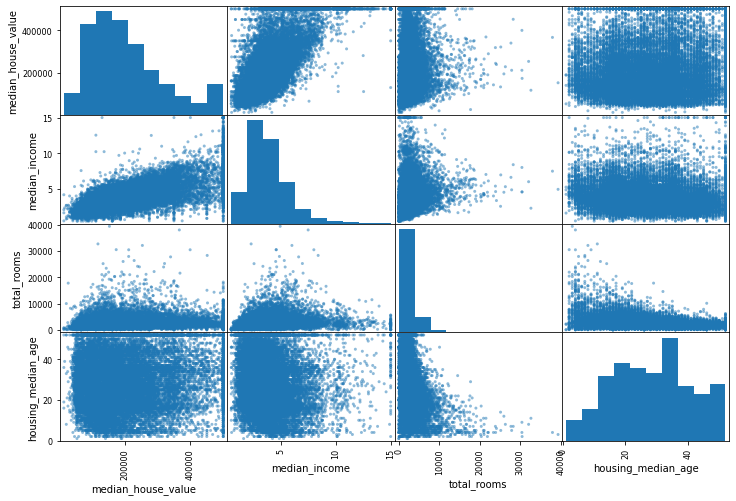

In [6]:
#Visualization 1
from pandas.plotting import scatter_matrix
columns = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_data_frame[columns], figsize=(12,8))

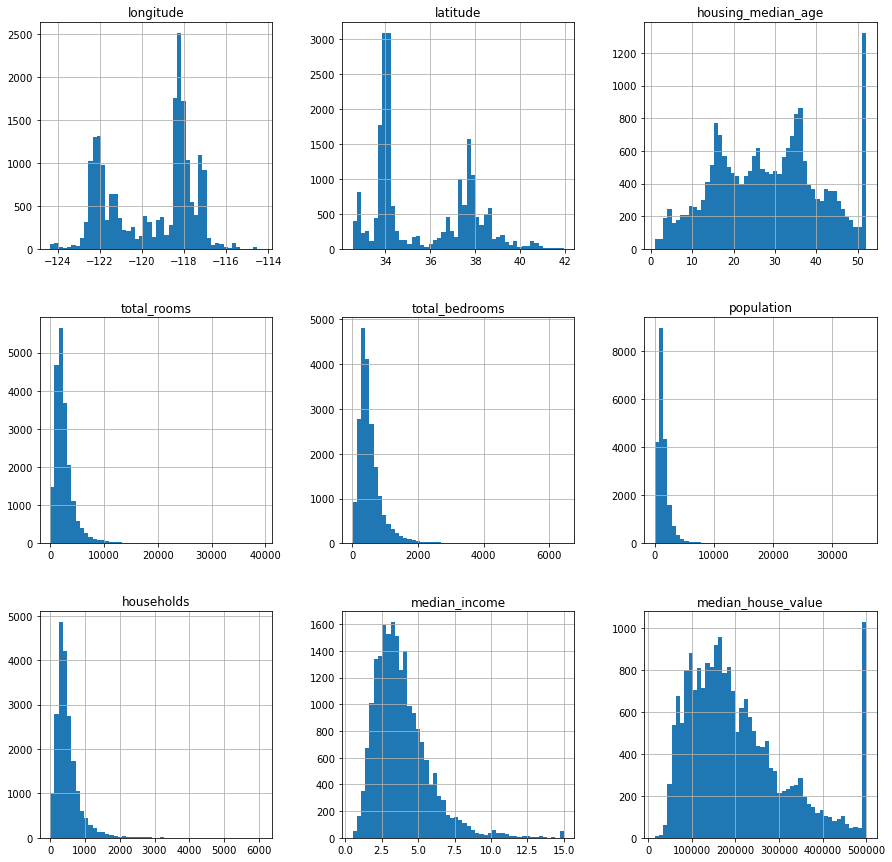

In [7]:
#Visualization 2
import matplotlib.pyplot as plt
housing_data_frame.hist(bins=50, figsize=(15,15))
plt.show()

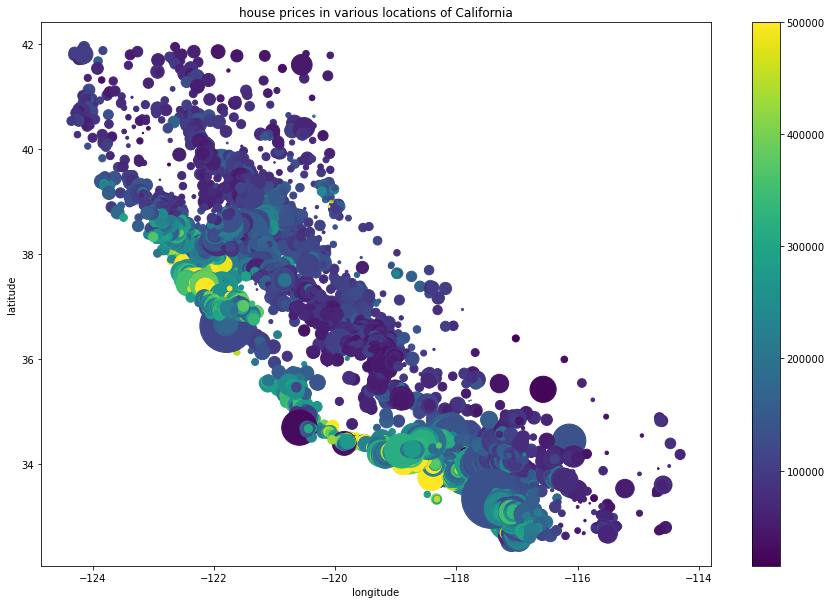

In [8]:
#Visualization 3
plt.figure(figsize=(15,10))
plt.scatter(housing_data_frame['longitude'],housing_data_frame['latitude'],
            c=housing_data_frame['median_house_value'],
            s=housing_data_frame['population']/10,
            cmap='viridis')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('house prices in various locations of California')
plt.show()

The radius of each circle represents the district's population (option s), and the color represents the price (option c). As we can see, prices are very high in coastal areas.<br>
We can see that Los Angeles (34.052235, -118.243683), San Diego (32.715736, -117.161087), Sacramento (37.773972, -122.431297), Fresno (36.746841, -119.772591) and the Bay Area (37.749997, -122.2833322) are high price areas.


[]

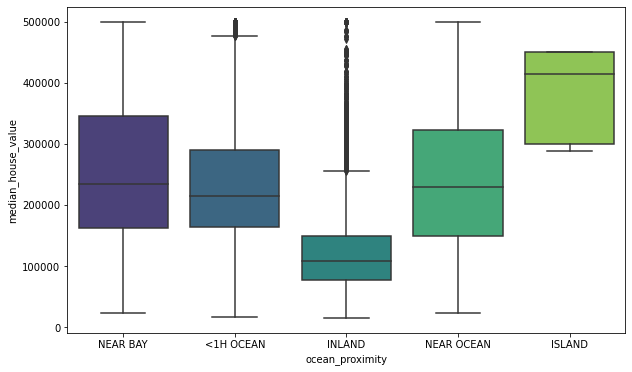

In [9]:
#Visualization 4
#boxplot of median_house_value on categories under ocean_proximity 
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=housing_data_frame,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.plot()


### Problems in the dataset

In [10]:
housing_data_frame.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<h4>Problems with the data:</h4>

1. The attribute total_bedrooms has 207 missing values.<br>
2. The category 'island' in the attribute ocean_proximity has only 5 data points, while other categories have atleast 2200 data points.<br>
3. We do not know the currency of median_income, although it should be US dollars since it's California. There is no income above 15 and below 0.5 so looks like values are capped.<br>
4. The atributes median_house_value and housing_median_age also seem to be capped<br>
5. All attributes have very different scales<br>
6. Many histograms in the scattermatrix shown above are skewed towards the right of the median. This imbalance will make it difficult for machine learning algorithms to detect patterns.<br>


#### Data Cleaning

In [11]:
#Distribution of data before cleaning
housing_data_frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing_data_frame.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
#Imputation of Missing Data for total_bedrooms 
housing_data_frame["total_bedrooms"].fillna(housing_data_frame["total_bedrooms"].median(), inplace=True)
housing_data_frame.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
#Visualizing the skewness in data
housing_data_frame.skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.481141
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms          -1.097338
total_bedrooms       -1.073832
population           -1.070786
households           -1.124358
median_income        -0.146082
median_house_value    0.977763
dtype: float64


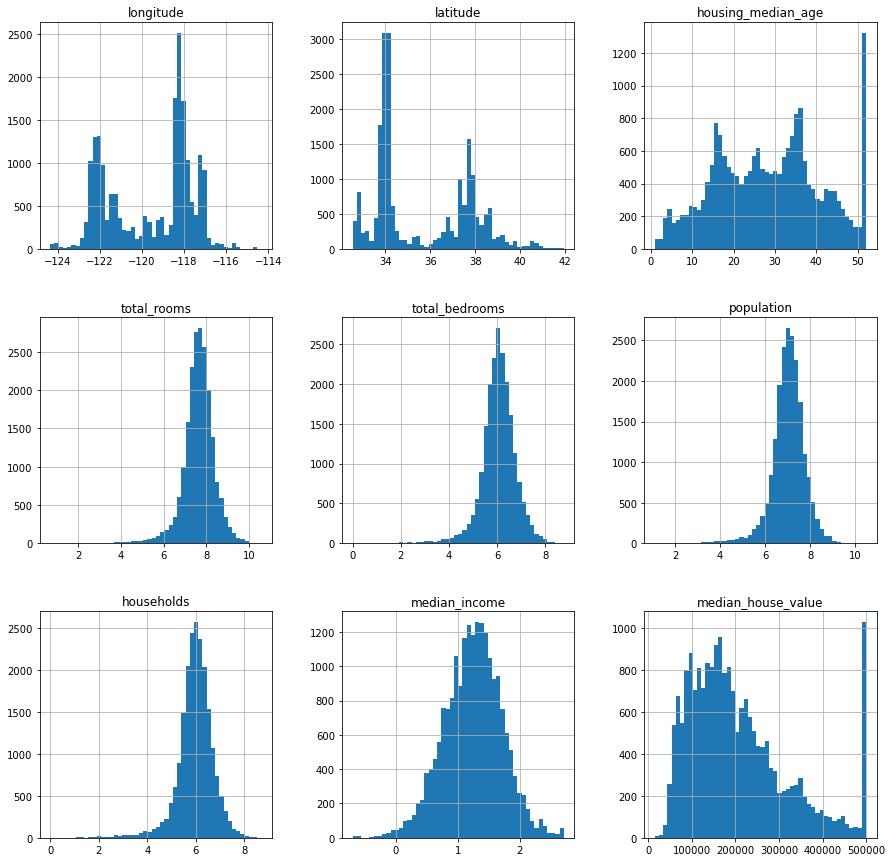

In [15]:
#Removing skewdness
import numpy as np
housing_data_frame["total_rooms"] = np.log(housing_data_frame["total_rooms"])
housing_data_frame["total_bedrooms"] = np.log(housing_data_frame["total_bedrooms"])
housing_data_frame["population"] = np.log(housing_data_frame["population"])
housing_data_frame["households"] = np.log(housing_data_frame["households"])
housing_data_frame["median_income"] = np.log(housing_data_frame["median_income"])
print(housing_data_frame.skew())
housing_data_frame.hist(bins=50, figsize=(15,15))
plt.show()

In [16]:
#Outlier removal
Q1 = housing_data_frame.quantile(0.25)
Q3 = housing_data_frame.quantile(0.75)
IQR = Q3 - Q1
housing_data_frame = housing_data_frame[~((housing_data_frame < (Q1 - 1.5 * IQR)) |(housing_data_frame > (Q3 + 1.5 * IQR))).any(axis=1)]
print(housing_data_frame.shape)

(18320, 10)


As seen above, there were a total of 20640 observations, out of which 18320 are left after outlier removal.

In [17]:
#Encoding for the categorical attribute 'ocean_proximity'
#Using Label encoder
import numpy as np
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_data_frame["ocean_proximity_cat"] = encoder.fit_transform(housing_data_frame["ocean_proximity"])

#Using OneHotEncoder on top of LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
housing_ocean_1henc = pd.DataFrame(encoder.fit_transform(housing_data_frame[["ocean_proximity_cat"]]).toarray(), columns=['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])
housing_data_frame = housing_data_frame.join(housing_ocean_1henc)
housing_data_frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_cat,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,2.119287,452600.0,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,2.116424,358500.0,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,1.982022,352100.0,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,1.730434,341300.0,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,1.347086,342200.0,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0


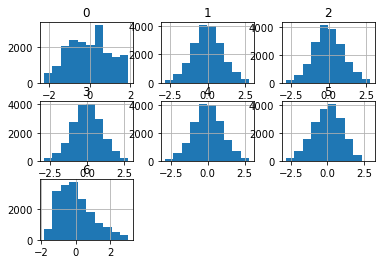

In [18]:
#Feature Scaling

#Excluding the columns that don't need feature scaling
housing_data_frame1 = housing_data_frame.drop(["latitude","longitude","ocean_proximity", "ocean_proximity_cat", "<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"], axis=1)
#Scaling
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
housing_data_frame1 = trans.fit_transform(housing_data_frame1)
dataset = pd.DataFrame(housing_data_frame1)
dataset.hist()
plt.show()

In [19]:
housing_data_frame.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_cat,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,18320.000000,18320.000000,18320.000000,18320.000000,18320.000000,18320.000000,18320.000000,18320.000000,18320.00000,18320.000000,16239.000000,16239.000000,16239.000000,16239.000000,16239.000000
mean,-119.564737,35.641344,28.536190,7.682593,6.110414,7.094685,6.046153,1.220362,191900.18548,1.145087,0.440668,0.320155,0.000246,0.108319,0.130611
std,2.001067,2.148877,12.290917,0.551326,0.539492,0.550091,0.535759,0.417531,95239.93131,1.407255,0.496482,0.466550,0.015693,0.310793,0.336985
min,-124.350000,32.540000,1.000000,6.113682,4.564348,5.501258,4.488636,0.020587,14999.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.770000,33.930000,18.000000,7.317212,5.746203,6.729824,5.686975,0.939020,117600.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,7.675546,6.089045,7.091326,6.037871,1.242511,174200.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.000000,37.720000,37.000000,8.043021,6.464588,7.460490,6.401917,1.520541,247700.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,9.219597,7.618251,8.629629,7.559559,2.451152,482200.00000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#Creating new features

#New features : Self-explanatory
housing_data_frame["rooms_per_household"] = housing_data_frame["total_rooms"]/housing_data_frame["households"] 
housing_data_frame["bedrooms_per_house"] = housing_data_frame["total_bedrooms"]/housing_data_frame["total_rooms"] 
housing_data_frame["population_per_household"] = housing_data_frame["population"]/housing_data_frame["households"]
housing_data_frame["income per working population"]=housing_data_frame['median_income']/(housing_data_frame['population']-housing_data_frame['households'])

#New features : 'building_age_cat' that shows building's age as new, mid old or old
def type_building(x):
    if x<=10:
        return "new"
    elif x<=30:
        return 'mid old'
    else:
        return 'old'

housing_data_frame["median_building_age"] = housing_data_frame.apply (lambda row: type_building(row.housing_median_age), axis=1)
encoder = LabelEncoder()
housing_data_frame["building_age_cat"] = encoder.fit_transform(housing_data_frame["median_building_age"])
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
housing_age_1henc = pd.DataFrame(encoder.fit_transform(housing_data_frame[["building_age_cat"]]).toarray(), columns=['mid old', 'new', 'old'])
housing_data_frame = housing_data_frame.join(housing_age_1henc)
housing_data_frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,NEAR OCEAN,rooms_per_household,bedrooms_per_house,population_per_household,income per working population,median_building_age,building_age_cat,mid old,new,old
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,2.119287,452600.0,NEAR BAY,...,0.0,1.401887,0.716795,1.194006,2.258719,old,2,0.0,0.0,1.0
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,2.116424,358500.0,NEAR BAY,...,0.0,1.260150,0.790340,1.106098,2.834700,mid old,0,1.0,0.0,0.0
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,1.982022,352100.0,NEAR BAY,...,0.0,1.408571,0.719660,1.199072,1.923497,old,2,0.0,0.0,1.0
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,1.730434,341300.0,NEAR BAY,...,0.0,1.326744,0.763587,1.173553,1.850163,old,2,0.0,0.0,1.0
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,1.347086,342200.0,NEAR BAY,...,0.0,1.330704,0.762025,1.140367,1.727038,old,2,0.0,0.0,1.0


Central : 37.16611 -119.44944
North Coast : 38.0193 -122.8631
Bay Area : 37.8272 -122.2913
Southern: 34.9592 -116.4194

In [21]:
#Re-checking the correlation after adding new columns
corr_matrix = housing_data_frame.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value               1.000000
income per working population    0.649582
median_income                    0.635063
total_rooms                      0.191100
households                       0.108246
<1H OCEAN                        0.106989
rooms_per_household              0.101930
housing_median_age               0.078920
total_bedrooms                   0.077278
ocean_proximity_cat              0.061541
building_age_cat                 0.046507
old                              0.014690
NEAR BAY                         0.013785
mid old                         -0.000675
population                      -0.007327
ISLAND                          -0.016109
new                             -0.027450
INLAND                          -0.033836
longitude                       -0.048541
NEAR OCEAN                      -0.122745
latitude                        -0.149923
bedrooms_per_house              -0.177059
population_per_household        -0.260846
Name: median_house_value, dtype: f

After preprocessing, 'income per working population' has the highest correlation with median_house_value at 0.64<br>
The new column population_per_household has a -0.26 negative correlation with median_house_value. This means that the houses with a lower population_per_household ratio tend to be more expensive. <br>
Although the correlation between rooms_per_household and median_house_value is very small (0.10), it indicates that larger the houses, the more expensive they are.